published by MohammadAmin Alamalhoda (2019) , feel free to use it anywhere !

In [0]:
!pip install brian2
!pip install matplotlib==3.1.2

In [0]:
from brian2 import *
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
import sys
sys.path.append('/content/drive/My Drive/neuroscience/')
import draw_utils

## $1_1$ 

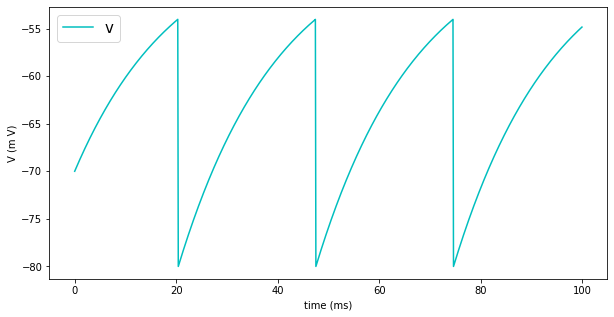

In [0]:
start_scope()
Tm=20*ms
El=-70*mV
IeRm= 25*mV
Vt=-54*mV
rm= 10*Mohm
eqs = '''
dv/dt = ( IeRm -(v-El))/Tm : volt
'''
Group = NeuronGroup(1, eqs,threshold='v > Vt',reset='v=-80*mV',method='euler')
statemon_v = StateMonitor(Group, 'v', record=True)
Group.v = El
run(100*ms)
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(statemon_v.t/ms, statemon_v.v[0]/mV, '-c',label='v')
ax.set_xlabel('time (ms)')
ax.set_ylabel('V (m V)')
ax.legend(loc='best',fontsize=15)

 ## $ 1_2$ : inhibitory synapses

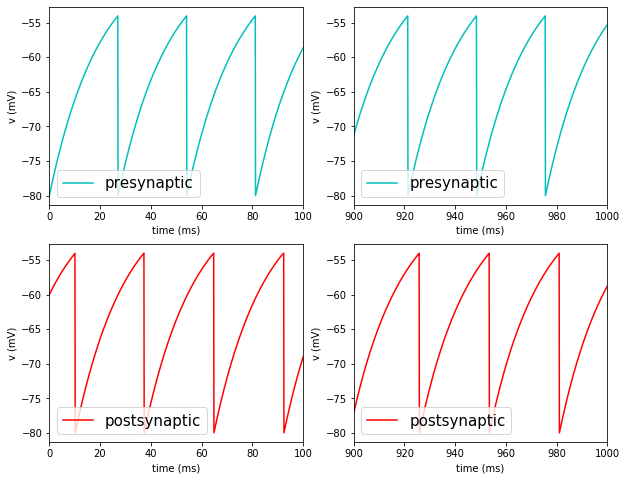

In [0]:
start_scope()
Tm=20*ms
El=-70*mV
IeRm= 25*mV
Vt=-54*mV
rm= 10*Mohm
Es=-80*mV
eqs = '''
dv/dt = ( IeRm -(v-El)-gs*(v-Es)*rm)/Tm : volt
dgs/dt = (-1*gs)/(10*ms) : siemens
'''

Group_1 = NeuronGroup(1, eqs,threshold='v > Vt',reset='v=-80*mV',method='euler')
Group_2 = NeuronGroup(1, eqs,threshold='v > Vt',reset='v=-80*mV',method='euler')
Group_1.v=-80*mV
Group_2.v=-60*mV
Group_1.gs=0*nsiemens
Group_2.gs=0*nsiemens

S=Synapses(Group_1,Group_2,on_pre='gs=gs+5*nsiemens',delay=10*ms)
S.connect(i=0, j=0)

M = StateMonitor(Group_1, ('v','gs'), record=True)
M2 = StateMonitor(Group_2,('v','gs'), record=True)
run(1000*ms)
fig, axs = plt.subplots(2, 2,figsize=[10,8])

axs[0, 0].plot(M.t/ms, M.v[0]/mV, '-c',label='presynaptic')
axs[0, 0].set_xlim([0, 100])
axs[0, 0].set_xlabel('time (ms)')
axs[0, 0].set_ylabel('v (mV)')
axs[1, 0].plot(M2.t/ms, M2.v[0]/mV, '-r',label='postsynaptic')
axs[1, 0].set_xlim([0, 100])
axs[1, 0].set_xlabel('time (ms)')
axs[1, 0].set_ylabel('v (mV)')
axs[0, 1].plot(M.t/ms, M.v[0]/mV, '-c',label='presynaptic')
axs[0, 1].set_xlim([900, 1000])
axs[0, 1].set_xlabel('time (ms)')
axs[0, 1].set_ylabel('v (mV)')
axs[1, 1].plot(M2.t/ms, M2.v[0]/mV, '-r',label='postsynaptic')
axs[1, 1].set_xlim([900, 1000])
axs[1, 1].set_xlabel('time (ms)')
axs[1, 1].set_ylabel('v (mV)')
axs[0, 0].legend(loc='best',fontsize=15)
axs[1, 0].legend(loc='best',fontsize=15)
axs[0, 1].legend(loc='best',fontsize=15)
axs[1, 1].legend(loc='best',fontsize=15)

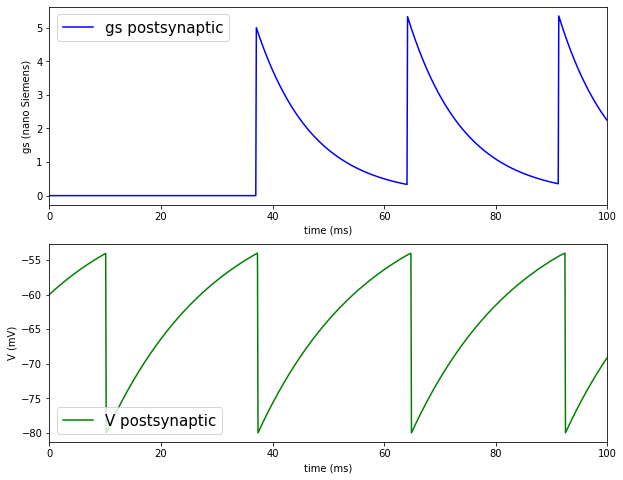

In [0]:
fig, ax = plt.subplots(2, 1,figsize=[10,8])
ax[0].plot(M.t/ms, M2.gs[0]/nsiemens, '-b',label='gs postsynaptic')
ax[0].set_xlim([0, 100])
ax[0].set_xlabel('time (ms)')
ax[0].set_ylabel('gs (nano Siemens)')
ax[0].legend(loc='best',fontsize=15)
ax[1].plot(M.t/ms, M2.v[0]/mV, '-g',label='V postsynaptic')
ax[1].set_xlim([0, 100])
ax[1].set_xlabel('time (ms)')
ax[1].set_ylabel('V (mV)')
ax[1].legend(loc='best',fontsize=15)

if Tau = $\frac{10}{4} ms$ :

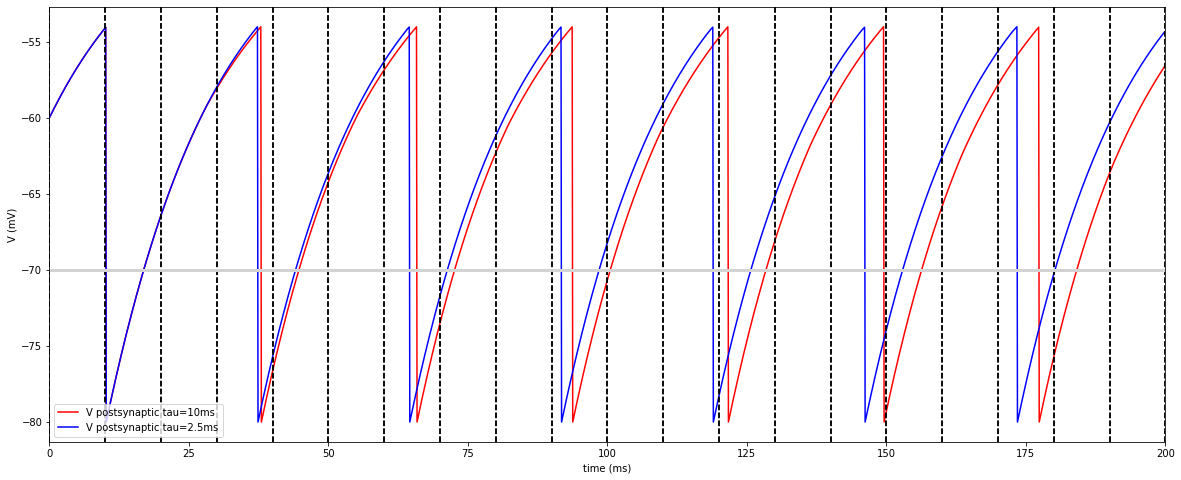

In [0]:
fig = plt.figure(figsize=[20,8])
ax = fig.add_subplot(111)
start_scope()
Tm=20*ms
El=-70*mV
IeRm= 25*mV
Vt=-54*mV
rm= 10*Mohm
Es=-80*mV
eqs = '''
dv/dt = ( IeRm -(v-El)-gs*(v-Es)*rm)/Tm : volt
dgs/dt = (-1*gs)/(10*ms) : siemens
'''
Group_1 = NeuronGroup(1, eqs,threshold='v > Vt',reset='v=-80*mV',method='euler')
Group_2 = NeuronGroup(1, eqs,threshold='v > Vt',reset='v=-80*mV',method='euler')
Group_1.v=-80*mV
Group_2.v=-60*mV
Group_1.gs=0*nsiemens
Group_2.gs=0*nsiemens

S=Synapses(Group_1,Group_2,on_pre='gs=gs+5*nsiemens',delay=1*ms)
S.connect(i=0, j=0)

M = StateMonitor(Group_2, ('v','gs'), record=True)
run(200*ms)

ax.plot(M.t/ms, M.v[0]/mV, '-r',label='V postsynaptic tau=10ms')
ax.set_xlim([0, 200])
ax.set_xlabel('time (ms)')
ax.set_ylabel('gs (nano Siemens)')
ax.legend(loc='best',fontsize=10)

start_scope()
eqs = '''
dv/dt = ( IeRm -(v-El)-gs*(v-Es)*rm)/Tm : volt
dgs/dt = (-1*gs)/(2.5*ms) : siemens
'''
Group_1 = NeuronGroup(1, eqs,threshold='v > Vt',reset='v=-80*mV',method='euler')
Group_2 = NeuronGroup(1, eqs,threshold='v > Vt',reset='v=-80*mV',method='euler')
Group_1.v=-80*mV
Group_2.v=-60*mV
Group_1.gs=0*nsiemens
Group_2.gs=0*nsiemens

S=Synapses(Group_1,Group_2,on_pre='gs=gs+5*nsiemens',delay=10*ms)
S.connect(i=0, j=0)

M = StateMonitor(Group_2, ('v','gs'), record=True)
run(200*ms)

ax.plot(M.t/ms, M.v[0]/mV, '-b',label='V postsynaptic tau=2.5ms')
ax.set_xlim([0, 200])
ax.set_xlabel('time (ms)')
ax.set_ylabel('V (mV)')
ax.legend(loc='best',fontsize=10)
for l in range(100):
    ax.axvline(l*10, ls='--', c='k')
    ax.axvline(l*10, ls='--', c='k')
ax.axhline(El/mV, ls='-', c='lightgray', lw=3)
ax.axhline(El/mV, ls='-', c='lightgray', lw=3)

as we can see , wen we reduce $Gs_{tau}$ to 5ms , as time increases, spiking rate increases.

## $1_3$ : excitatory synapses

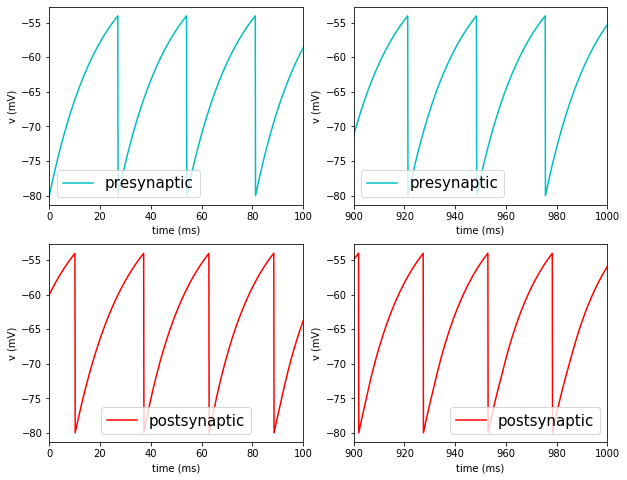

In [0]:
start_scope()
Tm=20*ms
El=-70*mV
IeRm= 25*mV
Vt=-54*mV
rm= 10*Mohm
Es=0*mV
eqs = '''
dv/dt = ( IeRm -(v-El)-gs*(v-Es)*rm)/Tm : volt
dgs/dt = (-1*gs)/(10*ms) : siemens
'''

Group_1 = NeuronGroup(1, eqs,threshold='v > Vt',reset='v=-80*mV',method='euler')
Group_2 = NeuronGroup(1, eqs,threshold='v > Vt',reset='v=-80*mV',method='euler')
Group_1.v=-80*mV
Group_2.v=-60*mV
Group_1.gs=0*nsiemens
Group_2.gs=0*nsiemens

S=Synapses(Group_1,Group_2,on_pre='gs=gs+5*nsiemens',delay=10*ms)
S.connect(i=0, j=0)

M = StateMonitor(Group_1, ('v','gs'), record=True)
M2 = StateMonitor(Group_2,('v','gs'), record=True)
run(1000*ms)
fig, axs = plt.subplots(2, 2,figsize=[10,8])

axs[0, 0].plot(M.t/ms, M.v[0]/mV, '-c',label='presynaptic')
axs[0, 0].set_xlim([0, 100])
axs[0, 0].set_xlabel('time (ms)')
axs[0, 0].set_ylabel('v (mV)')
axs[1, 0].plot(M2.t/ms, M2.v[0]/mV, '-r',label='postsynaptic')
axs[1, 0].set_xlim([0, 100])
axs[1, 0].set_xlabel('time (ms)')
axs[1, 0].set_ylabel('v (mV)')
axs[0, 1].plot(M.t/ms, M.v[0]/mV, '-c',label='presynaptic')
axs[0, 1].set_xlim([900, 1000])
axs[0, 1].set_xlabel('time (ms)')
axs[0, 1].set_ylabel('v (mV)')
axs[1, 1].plot(M2.t/ms, M2.v[0]/mV, '-r',label='postsynaptic')
axs[1, 1].set_xlim([900, 1000])
axs[1, 1].set_xlabel('time (ms)')
axs[1, 1].set_ylabel('v (mV)')
axs[0, 0].legend(loc='best',fontsize=15)
axs[1, 0].legend(loc='best',fontsize=15)
axs[0, 1].legend(loc='best',fontsize=15)
axs[1, 1].legend(loc='best',fontsize=15)

for excitatory synapses ,spike frequency in post synaptic neurons increases.




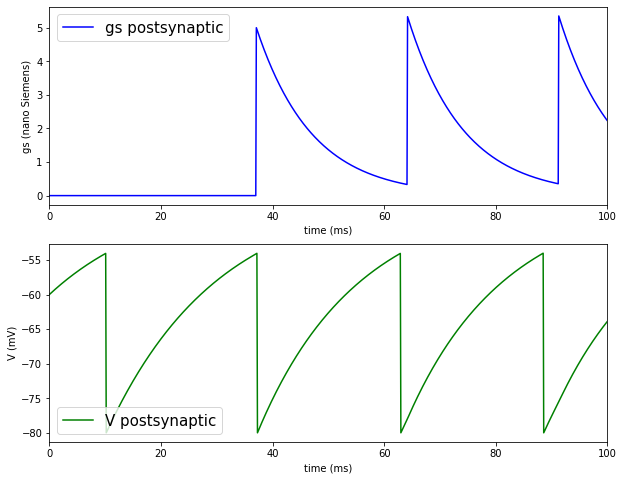

In [0]:
fig, ax = plt.subplots(2, 1,figsize=[10,8])
ax[0].plot(M.t/ms, M2.gs[0]/nsiemens, '-b',label='gs postsynaptic')
ax[0].set_xlim([0, 100])
ax[0].set_xlabel('time (ms)')
ax[0].set_ylabel('gs (nano Siemens)')
ax[0].legend(loc='best',fontsize=15)
ax[1].plot(M.t/ms, M2.v[0]/mV, '-g',label='V postsynaptic')
ax[1].set_xlim([0, 100])
ax[1].set_xlabel('time (ms)')
ax[1].set_ylabel('V (mV)')
ax[1].legend(loc='best',fontsize=15)

if Tau = $\frac{10}{4} ms$ :

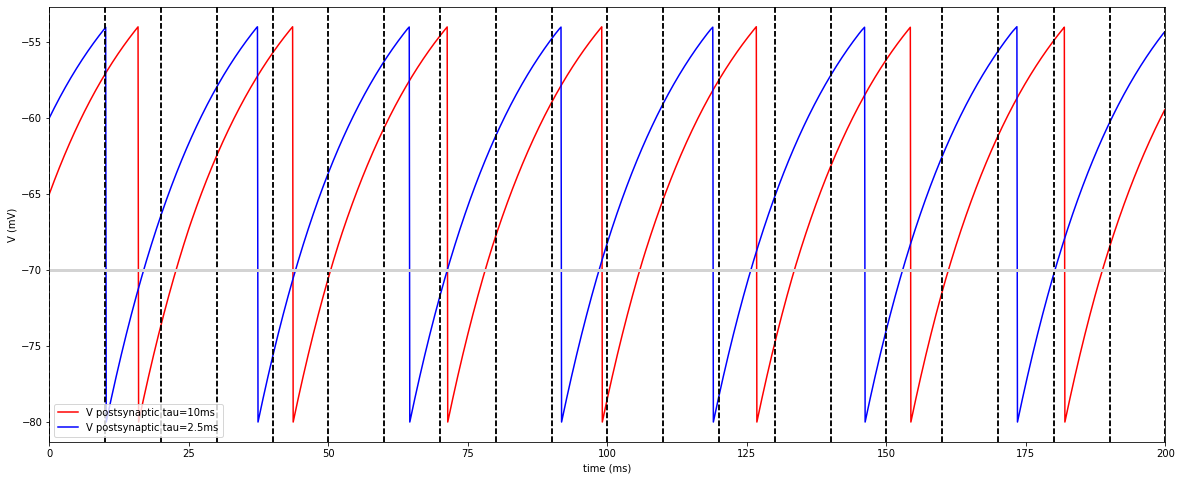

In [0]:
fig = plt.figure(figsize=[20,8])
ax = fig.add_subplot(111)
start_scope()
Tm=20*ms
El=-70*mV
IeRm= 25*mV
Vt=-54*mV
rm= 10*Mohm
Es=-80*mV
eqs = '''
dv/dt = ( IeRm -(v-El)-gs*(v-Es)*rm)/Tm : volt
dgs/dt = (-1*gs)/(10*ms) : siemens
'''
Group_1 = NeuronGroup(1, eqs,threshold='v > Vt',reset='v=-80*mV',method='euler')
Group_2 = NeuronGroup(1, eqs,threshold='v > Vt',reset='v=-80*mV',method='euler')
Group_1.v=El-5*mV
Group_2.v=El+5*mV
Group_1.gs=0*nsiemens
Group_2.gs=0*nsiemens

S=Synapses(Group_1,Group_2,on_pre='gs=gs+5*nsiemens',delay=1*ms)
S.connect(i=0, j=0)

M = StateMonitor(Group_2, ('v','gs'), record=True)
run(200*ms)

ax.plot(M.t/ms, M.v[0]/mV, '-r',label='V postsynaptic tau=10ms')
ax.set_xlim([0, 200])
ax.set_xlabel('time (ms)')
ax.set_ylabel('gs (nano Siemens)')
ax.legend(loc='best',fontsize=10)

start_scope()
eqs = '''
dv/dt = ( IeRm -(v-El)-gs*(v-Es)*rm)/Tm : volt
dgs/dt = (-1*gs)/(2.5*ms) : siemens
'''
Group_1 = NeuronGroup(1, eqs,threshold='v > Vt',reset='v=-80*mV',method='euler')
Group_2 = NeuronGroup(1, eqs,threshold='v > Vt',reset='v=-80*mV',method='euler')
Group_1.v=-80*mV
Group_2.v=-60*mV
Group_1.gs=0*nsiemens
Group_2.gs=0*nsiemens

S=Synapses(Group_1,Group_2,on_pre='gs=gs+5*nsiemens',delay=10*ms)
S.connect(i=0, j=0)

M = StateMonitor(Group_2, ('v','gs'), record=True)
run(200*ms)

ax.plot(M.t/ms, M.v[0]/mV, '-b',label='V postsynaptic tau=2.5ms')
ax.set_xlim([0, 200])
ax.set_xlabel('time (ms)')
ax.set_ylabel('V (mV)')
ax.legend(loc='best',fontsize=10)
for l in range(100):
    ax.axvline(l*10, ls='--', c='k')
    ax.axvline(l*10, ls='--', c='k')
ax.axhline(El/mV, ls='-', c='lightgray', lw=3)
ax.axhline(El/mV, ls='-', c='lightgray', lw=3)

#### **conclusion** :for excitatory synapses , post-synaptic neurons spike rate will increase and it will be more than  pre-synaptic neurons , meanwhile for inhibitory synapses , post synaptic neurons spike rate is equal to pre-synaptic neurons spike rate.

## $2_1$ 

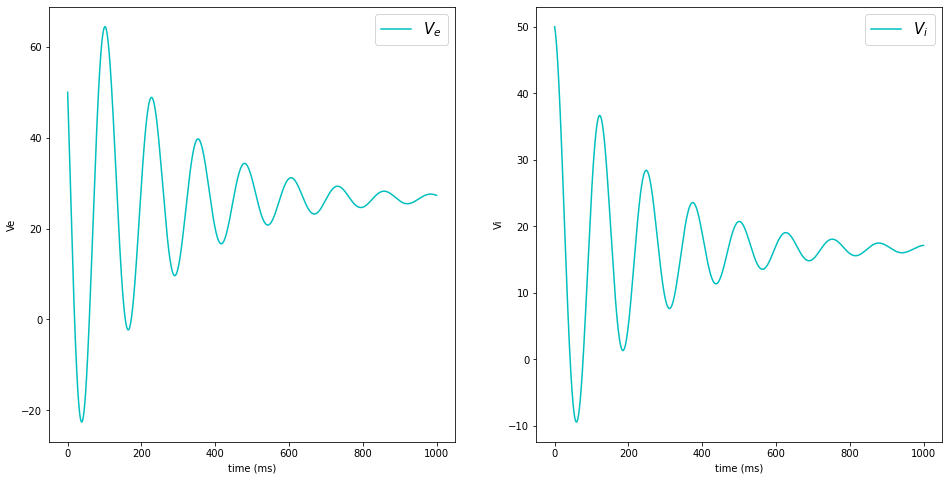

In [0]:
start_scope()

Taue=10*ms
Mee=1.25
Mei=-1
Ye=-10*hertz
Mie=1
Mii=0
Yi=10*hertz
eqs1='''
dVe/dt = (-Ve+(Mee*Ve+Mei*Vi-Ye))/Taue : hertz
Vi : hertz (linked)

'''

eqs2='''
dVi/dt = (-Vi+(Mie*Ve+Mii*Vi-Yi))/Taui : hertz
Ve : hertz (linked)
'''

Group_1 = NeuronGroup(1, eqs1,method='euler')
Group_2 = NeuronGroup(1, eqs2,method='euler')

Group_1.Vi = linked_var(Group_2, 'Vi')
Group_2.Ve = linked_var(Group_1, 'Ve')

Taui=30*ms

Group_1.Ve=50*hertz
Group_2.Vi=50*hertz

statemon_1 = StateMonitor(Group_1,'Ve',record=True)
statemon_2 = StateMonitor(Group_1,'Vi',record=True)
run(1000*ms)
fig, axs = plt.subplots(1, 2,figsize=[16,8])
axs[0].plot(statemon_1.t/ms, statemon_1.Ve[0], '-c',label='$V_e$')
axs[0].set_xlabel('time (ms)')
axs[0].set_ylabel('Ve (Hz)')
axs[1].plot(statemon_2.t/ms, statemon_2.Vi[0], '-c',label='$V_i$')
axs[1].set_xlabel('time (ms)')
axs[1].set_ylabel('Vi (Hz)')
axs[0].legend(loc='best',fontsize=15)
axs[1].legend(loc='best',fontsize=15)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


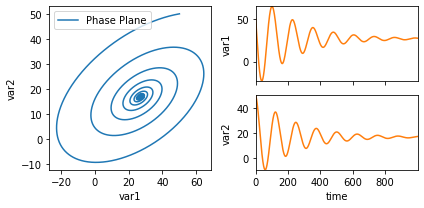

In [0]:
draw_utils.phaseplane_animation(statemon_1.t/ms, statemon_1.Ve[0]/hertz, statemon_2.Vi[0]/hertz)

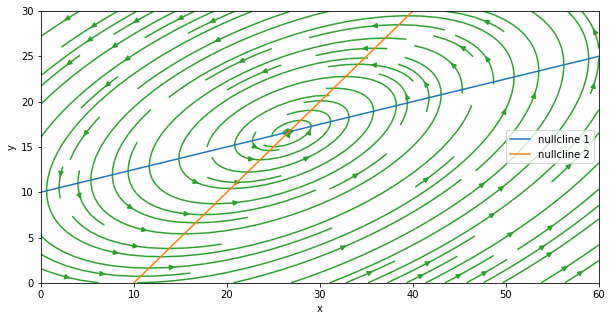

In [0]:
def F(X, Y, params):
    return (-X + params[0]*X + params[1]*Y -params[2] )/params[3]

def G(X, Y, params):
    return (-Y + params[4]*X + params[5]*Y -params[6] )/params[7]

def f_null1(x, params):
    return (x-params[0]*x+params[2])/params[1]

def f_null2(x, params):
    return (params[6]-params[4]*x)/(params[5]-1)

params = [1.25,-1,-10,Taue/ms,1,0,10,Taui/ms]
draw_utils.plot_phaseplane(F, G, f_null1, f_null2, extra_params=params,
                           x_range=[0,60], y_range=[0,30])

## $2_2$ 

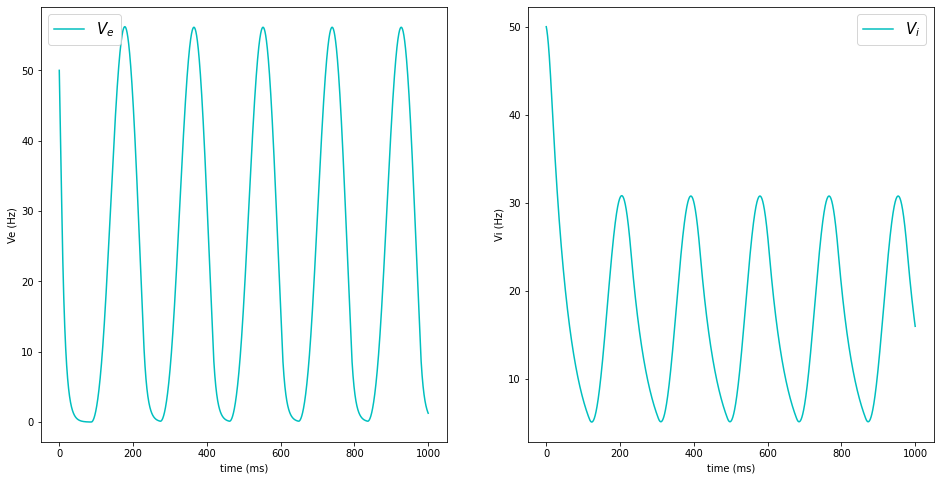

In [0]:
start_scope()

Taue=10*ms
Mee=1.25
Mei=-1
Ye=-10*hertz
Mie=1
Mii=0
Yi=10*hertz
eqs1='''
dVe/dt = (-Ve+clip((Mee*Ve+Mei*Vi-Ye),0,100*hertz))/Taue : hertz
Vi : hertz (linked)

'''

eqs2='''
dVi/dt = (-Vi+clip((Mie*Ve+Mii*Vi-Yi),0,100*hertz))/Taui : hertz
Ve : hertz (linked)
'''

Group_1 = NeuronGroup(1, eqs1,method='euler')
Group_2 = NeuronGroup(1, eqs2,method='euler')

Group_1.Vi = linked_var(Group_2, 'Vi')
Group_2.Ve = linked_var(Group_1, 'Ve')

Taui=50*ms

Group_1.Ve=50*hertz
Group_2.Vi=50*hertz

statemon_1 = StateMonitor(Group_1,'Ve',record=True)
statemon_2 = StateMonitor(Group_1,'Vi',record=True)
run(1000*ms)
fig, axs = plt.subplots(1, 2,figsize=[16,8])
axs[0].plot(statemon_1.t/ms, statemon_1.Ve[0], '-c',label='$V_e$')
axs[0].set_xlabel('time (ms)')
axs[0].set_ylabel('Ve (Hz)')
axs[1].plot(statemon_2.t/ms, statemon_2.Vi[0], '-c',label='$V_i$')
axs[1].set_xlabel('time (ms)')
axs[1].set_ylabel('Vi (Hz)')
axs[0].legend(loc='best',fontsize=15)
axs[1].legend(loc='best',fontsize=15)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


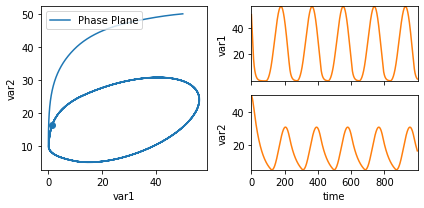

In [0]:
draw_utils.phaseplane_animation(statemon_1.t/ms, statemon_1.Ve[0]/hertz, statemon_2.Vi[0]/hertz)

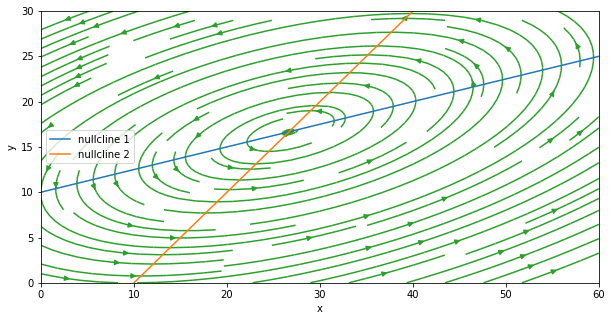

In [0]:
def F(X, Y, params):
    return (-X + params[0]*X + params[1]*Y -params[2] )/params[3]

def G(X, Y, params):
    return (-Y + params[4]*X + params[5]*Y -params[6] )/params[7]

def f_null1(x, params):
    return (x-params[0]*x+params[2])/params[1]

def f_null2(x, params):
    return (params[6]-params[4]*x)/(params[5]-1)

params = [1.25,-1,-10,Taue/ms,1,0,10,Taui/ms]
draw_utils.plot_phaseplane(F, G, f_null1, f_null2, extra_params=params,
                           x_range=[0,60], y_range=[0,30])

## $2_3$ 

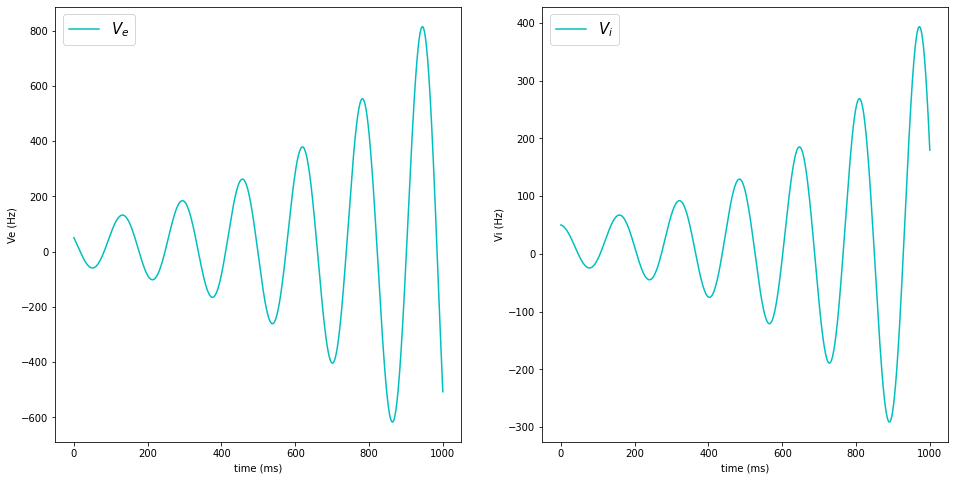

In [0]:
start_scope()

Taue=10*ms
Mee=1.25
Mei=-1
Ye=-10*hertz
Mie=1
Mii=0
Yi=10*hertz
eqs1='''
dVe/dt = (-Ve+(Mee*Ve+Mei*Vi-Ye))/Taue : hertz
Vi : hertz (linked)

'''

eqs2='''
dVi/dt = (-Vi+(Mie*Ve+Mii*Vi-Yi))/Taui : hertz
Ve : hertz (linked)
'''

Group_1 = NeuronGroup(1, eqs1,method='euler')
Group_2 = NeuronGroup(1, eqs2,method='euler')

Group_1.Vi = linked_var(Group_2, 'Vi')
Group_2.Ve = linked_var(Group_1, 'Ve')

Taui=50*ms

Group_1.Ve=50*hertz
Group_2.Vi=50*hertz

statemon_1 = StateMonitor(Group_1,'Ve',record=True)
statemon_2 = StateMonitor(Group_1,'Vi',record=True)
run(1000*ms)
fig, axs = plt.subplots(1, 2,figsize=[16,8])
axs[0].plot(statemon_1.t/ms, statemon_1.Ve[0], '-c',label='$V_e$')
axs[0].set_xlabel('time (ms)')
axs[0].set_ylabel('Ve (Hz)')
axs[1].plot(statemon_2.t/ms, statemon_2.Vi[0], '-c',label='$V_i$')
axs[1].set_xlabel('time (ms)')
axs[1].set_ylabel('Vi (Hz)')
axs[0].legend(loc='best',fontsize=15)
axs[1].legend(loc='best',fontsize=15)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


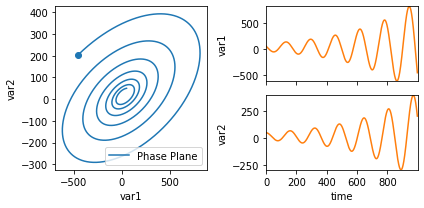

In [0]:
draw_utils.phaseplane_animation(statemon_1.t/ms, statemon_1.Ve[0]/hertz, statemon_2.Vi[0]/hertz)

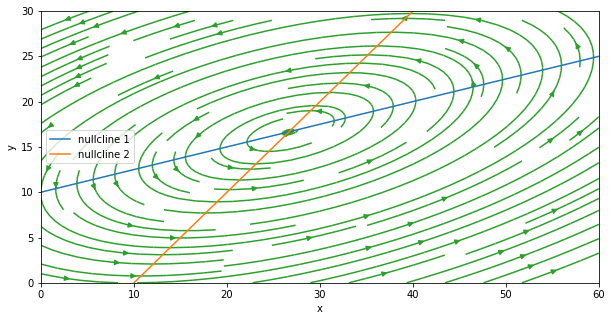

In [0]:
def F(X, Y, params):
    return (-X + params[0]*X + params[1]*Y -params[2] )/params[3]

def G(X, Y, params):
    return (-Y + params[4]*X + params[5]*Y -params[6] )/params[7]

def f_null1(x, params):
    return (x-params[0]*x+params[2])/params[1]

def f_null2(x, params):
    return (params[6]-params[4]*x)/(params[5]-1)

params = [1.25,-1,-10,Taue/ms,1,0,10,Taui/ms]
draw_utils.plot_phaseplane(F, G, f_null1, f_null2, extra_params=params,
                           x_range=[0,60], y_range=[0,30])

as we saw in the lectures , when $T_i$ is less than 40ms , the system is stable 
therefor $V_e$ and $V_i$ **converge** to zeros after a specific time , but when $T_i$ is greater than 40ms, system is unstable and as we can see $V_e$ and $V_i$ **diverge** 
so :


*   $T_i < 40ms : stable $
*   $T_i > 40ms : unstable $



## $2_4$ : simulation for  𝑇𝑖 =40ms

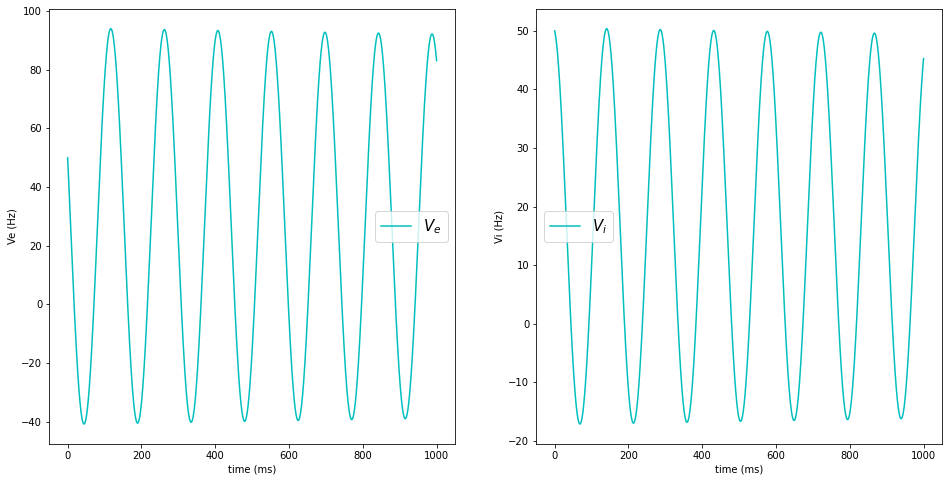

In [0]:
start_scope()

Taue=10*ms
Mee=1.25
Mei=-1
Ye=-10*hertz
Mie=1
Mii=0
Yi=10*hertz
eqs1='''
dVe/dt = (-Ve+(Mee*Ve+Mei*Vi-Ye))/Taue : hertz
Vi : hertz (linked)

'''

eqs2='''
dVi/dt = (-Vi+(Mie*Ve+Mii*Vi-Yi))/Taui : hertz
Ve : hertz (linked)
'''

Group_1 = NeuronGroup(1, eqs1,method='euler')
Group_2 = NeuronGroup(1, eqs2,method='euler')

Group_1.Vi = linked_var(Group_2, 'Vi')
Group_2.Ve = linked_var(Group_1, 'Ve')

Taui=40*ms

Group_1.Ve=50*hertz
Group_2.Vi=50*hertz

statemon_1 = StateMonitor(Group_1,'Ve',record=True)
statemon_2 = StateMonitor(Group_1,'Vi',record=True)
run(1000*ms)
fig, axs = plt.subplots(1, 2,figsize=[16,8])
axs[0].plot(statemon_1.t/ms, statemon_1.Ve[0], '-c',label='$V_e$')
axs[0].set_xlabel('time (ms)')
axs[0].set_ylabel('Ve (Hz)')
axs[1].plot(statemon_2.t/ms, statemon_2.Vi[0], '-c',label='$V_i$')
axs[1].set_xlabel('time (ms)')
axs[1].set_ylabel('Vi (Hz)')
axs[0].legend(loc='best',fontsize=15)
axs[1].legend(loc='best',fontsize=15)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


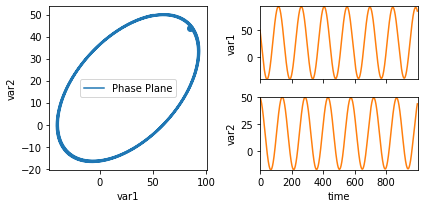

In [0]:
draw_utils.phaseplane_animation(statemon_1.t/ms, statemon_1.Ve[0]/hertz, statemon_2.Vi[0]/hertz)

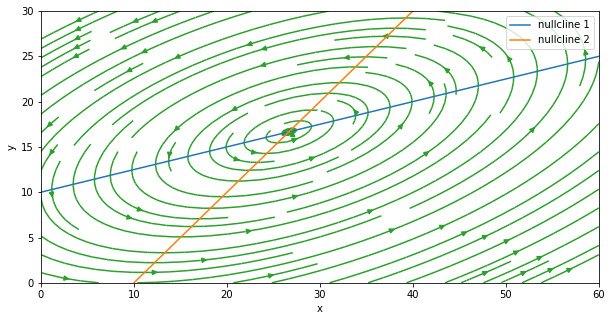

In [0]:
def F(X, Y, params):
    return (-X + params[0]*X + params[1]*Y -params[2] )/params[3]

def G(X, Y, params):
    return (-Y + params[4]*X + params[5]*Y -params[6] )/params[7]

def f_null1(x, params):
    return (x-params[0]*x+params[2])/params[1]

def f_null2(x, params):
    return (params[6]-params[4]*x)/(params[5]-1)

params = [1.25,-1,-10,Taue/ms,1,0,10,Taui/ms]
draw_utils.plot_phaseplane(F, G, f_null1, f_null2, extra_params=params,
                           x_range=[0,60], y_range=[0,30])

I did the simulation for $T_i$=40ms and it is exactly the point between system stability and unstability and as we see in the resuts , there will be purely imaginary eigenvalues and so $V_i$ and $V_e$ will **oscillate** **forever**.

*   $T_i < 40ms : stable $
*   $T_i = 40ms : stable(neutrally) $
*   $T_i > 40ms : unstable $



## $2_4$ : simulation for  $T_i$ =30ms and $M_{ei}$=0

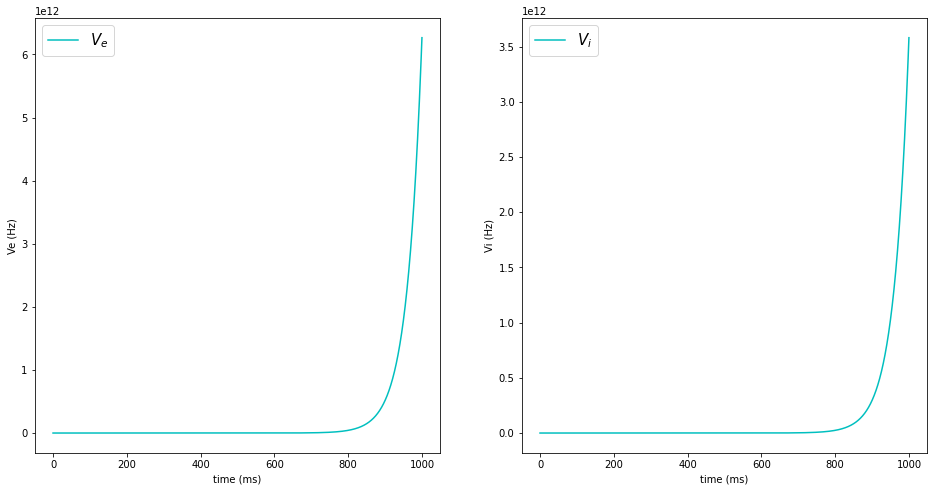

In [0]:
start_scope()

Taue=10*ms
Mee=1.25
Mei=0
Ye=-10*hertz
Mie=1
Mii=0
Yi=10*hertz
eqs1='''
dVe/dt = (-Ve+(Mee*Ve+Mei*Vi-Ye))/Taue : hertz
Vi : hertz (linked)

'''

eqs2='''
dVi/dt = (-Vi+(Mie*Ve+Mii*Vi-Yi))/Taui : hertz
Ve : hertz (linked)
'''

Group_1 = NeuronGroup(1, eqs1,method='euler')
Group_2 = NeuronGroup(1, eqs2,method='euler')

Group_1.Vi = linked_var(Group_2, 'Vi')
Group_2.Ve = linked_var(Group_1, 'Ve')

Taui=30*ms

Group_1.Ve=50*hertz
Group_2.Vi=50*hertz

statemon_1 = StateMonitor(Group_1,'Ve',record=True)
statemon_2 = StateMonitor(Group_1,'Vi',record=True)
run(1000*ms)
fig, axs = plt.subplots(1, 2,figsize=[16,8])
axs[0].plot(statemon_1.t/ms, statemon_1.Ve[0], '-c',label='$V_e$')
axs[0].set_xlabel('time (ms)')
axs[0].set_ylabel('Ve (Hz)')
axs[1].plot(statemon_2.t/ms, statemon_2.Vi[0], '-c',label='$V_i$')
axs[1].set_xlabel('time (ms)')
axs[1].set_ylabel('Vi (Hz)')
axs[0].legend(loc='best',fontsize=15)
axs[1].legend(loc='best',fontsize=15)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


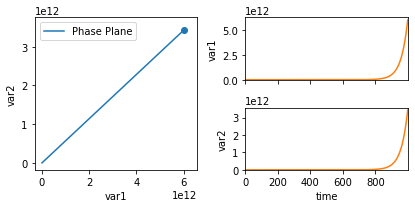

In [0]:
draw_utils.phaseplane_animation(statemon_1.t/ms, statemon_1.Ve[0]/hertz, statemon_2.Vi[0]/hertz)

WARNING    /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
 [py.warnings]


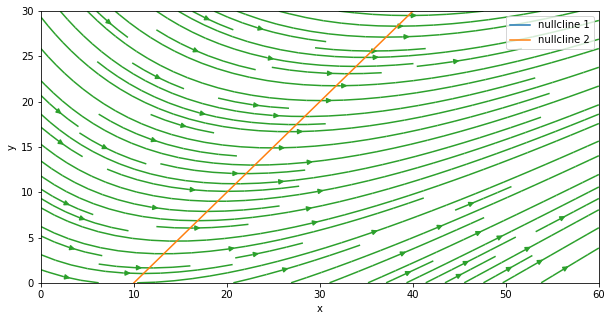

In [0]:
def F(X, Y, params):
    return (-X + params[0]*X + params[1]*Y -params[2] )/params[3]

def G(X, Y, params):
    return (-Y + params[4]*X + params[5]*Y -params[6] )/params[7]

def f_null1(x, params):
    return (x-params[0]*x+params[2])/params[1]

def f_null2(x, params):
    return (params[6]-params[4]*x)/(params[5]-1)

params = [1.25,0,-10,Taue/ms,1,0,10,Taui/ms]
draw_utils.plot_phaseplane(F, G, f_null1, f_null2, extra_params=params,
                           x_range=[0,60], y_range=[0,30])

as we see in the results , for $M_{ei}$=0 there would be no oscillation and the $V_i$ and $V_e$ will divege exponentialy.so we can see importance of   inhibitory neurons feedback in system stability.

## $2_4$ : simulation for  $T_i$ =50ms and $M_{ei}$=0

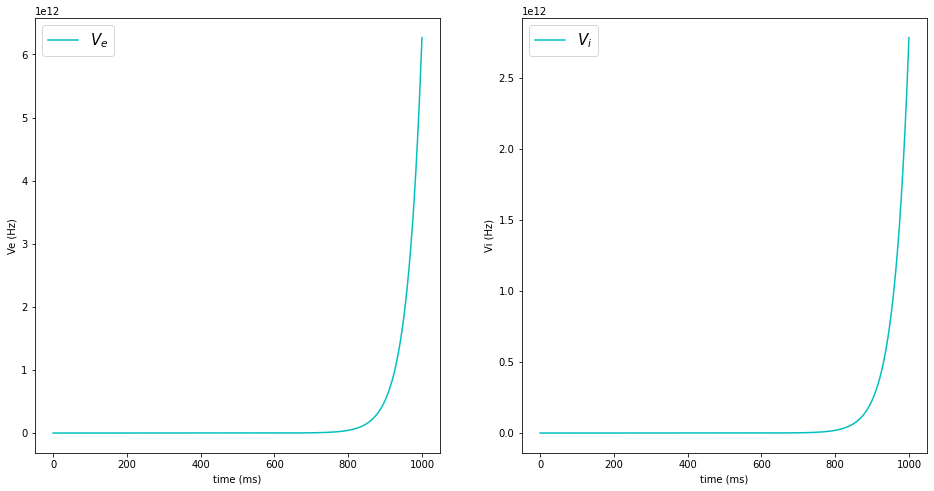

In [0]:
start_scope()

Taue=10*ms
Mee=1.25
Mei=0
Ye=-10*hertz
Mie=1
Mii=0
Yi=10*hertz
eqs1='''
dVe/dt = (-Ve+(Mee*Ve+Mei*Vi-Ye))/Taue : hertz
Vi : hertz (linked)

'''

eqs2='''
dVi/dt = (-Vi+(Mie*Ve+Mii*Vi-Yi))/Taui : hertz
Ve : hertz (linked)
'''

Group_1 = NeuronGroup(1, eqs1,method='euler')
Group_2 = NeuronGroup(1, eqs2,method='euler')

Group_1.Vi = linked_var(Group_2, 'Vi')
Group_2.Ve = linked_var(Group_1, 'Ve')

Taui=50*ms

Group_1.Ve=50*hertz
Group_2.Vi=50*hertz

statemon_1 = StateMonitor(Group_1,'Ve',record=True)
statemon_2 = StateMonitor(Group_1,'Vi',record=True)
run(1000*ms)
fig, axs = plt.subplots(1, 2,figsize=[16,8])
axs[0].plot(statemon_1.t/ms, statemon_1.Ve[0], '-c',label='$V_e$')
axs[0].set_xlabel('time (ms)')
axs[0].set_ylabel('Ve (Hz)')
axs[1].plot(statemon_2.t/ms, statemon_2.Vi[0], '-c',label='$V_i$')
axs[1].set_xlabel('time (ms)')
axs[1].set_ylabel('Vi (Hz)')
axs[0].legend(loc='best',fontsize=15)
axs[1].legend(loc='best',fontsize=15)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


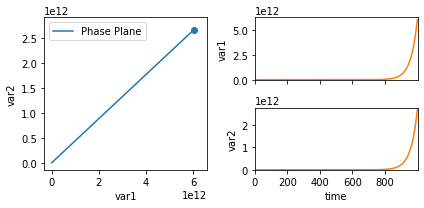

In [0]:
draw_utils.phaseplane_animation(statemon_1.t/ms, statemon_1.Ve[0]/hertz, statemon_2.Vi[0]/hertz)

WARNING    /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
 [py.warnings]


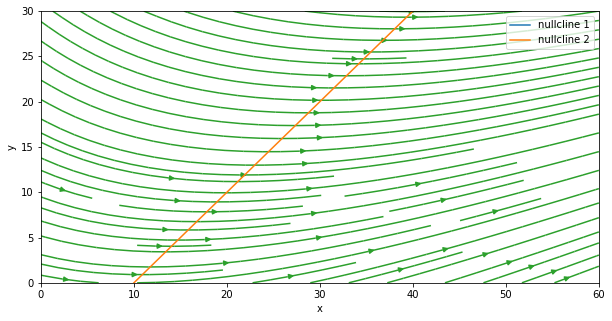

In [0]:
def F(X, Y, params):
    return (-X + params[0]*X + params[1]*Y -params[2] )/params[3]

def G(X, Y, params):
    return (-Y + params[4]*X + params[5]*Y -params[6] )/params[7]

def f_null1(x, params):
    return (x-params[0]*x+params[2])/params[1]

def f_null2(x, params):
    return (params[6]-params[4]*x)/(params[5]-1)

params = [1.25,0,-10,Taue/ms,1,0,10,Taui/ms]
draw_utils.plot_phaseplane(F, G, f_null1, f_null2, extra_params=params,
                           x_range=[0,60], y_range=[0,30])

as we see in the results , for $M_{ei}$=0 there would be no oscillation and the $V_i$ and $V_e$ will divege exponentialy.so we can see importance of   inhibitory neurons feedback in system stability , furthermore we see when  $M_{ei}$ is zero, change of $T_i$ doesn't have no effect on system stability.